In [1]:
!nvidia-smi

Failed to initialize NVML: Unknown Error


In [2]:
from domino import DominoSlicer
import numpy as np
import sklearn
import pandas as pd
sklearn.__version__

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random
import torch

In [3]:
seed = 42
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

In [4]:
def gen_tsne(predict, clip_emb, plot_n = None, n = 5):
    cluster_label = np.argmax(predict, axis = -1)
    label, counts = np.unique(cluster_label, return_counts = True)
    print(label, counts)
    counts = min(counts)

    if plot_n != None:
        counts = plot_n
    random.seed(42)
    print(counts)
    
    filter_0 = random.sample(list(np.where(cluster_label == 0)[0]), counts)
    filter_1 = random.sample(list(np.where(cluster_label == 1)[0]), counts)
    filtered_clip_embeds = clip_emb[filter_0]
    filtered_labels = cluster_label[filter_0]
    filtered_clip_embeds = np.concatenate((filtered_clip_embeds, clip_emb[filter_1]))
    filtered_labels = np.concatenate((filtered_labels, cluster_label[filter_1]))
    if n == 5:
        filter_2 = random.sample(list(np.where(cluster_label == 2)[0]), counts)
        filter_3 = random.sample(list(np.where(cluster_label == 3)[0]), counts)
        filter_4 = random.sample(list(np.where(cluster_label == 4)[0]), counts)
        for filter_n in [filter_2,filter_3, filter_4]:
            filtered_clip_embeds = np.concatenate((filtered_clip_embeds, clip_emb[filter_n]))
            filtered_labels = np.concatenate((filtered_labels, cluster_label[filter_n]))

    X_embedded = TSNE(n_components=2, learning_rate='auto', 
                      init='random', perplexity=3).fit_transform(filtered_clip_embeds)

    X_embedded.shape

    tsne_result_df = pd.DataFrame({'component1': X_embedded[:,0],
                                   'component2': X_embedded[:,1],
                                   'label': filtered_labels})
    fig, ax = plt.subplots(1)
    sns.scatterplot(x = 'component1',
                    y = 'component2',
                    hue = 'label',
                    data = tsne_result_df, ax = ax, sizes = 5)
    lim = (X_embedded.min() - 5, X_embedded.max() + 5)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.0)

## All classes | 5 slices

In [5]:
# places8_clip_emd = "data/places8_image_features_clip.npy"
# places8_image_preds = "data/places8_image_preds_1hot.npy"
# places8_targets = "data/places8_image_targets.npy"
# clip_emb_all = np.load(places8_clip_emd)
# image_1hot_preds = np.load(places8_image_preds)
# places8_targets = np.load(places8_targets)

# print("Data with all 8 classes:")
# print(f"Embed shape {clip_emb_all.shape} | target shape {places8_targets.shape} | preds one-hot encode shapes {image_1hot_preds.shape}")

# image_1hot_preds= image_1hot_preds.astype('int8')
# image_1hot_preds.dtype, image_1hot_preds.shape

In [6]:
# # N mixture components = 65
# slicer = DominoSlicer(
#     y_log_likelihood_weight=40,
#     y_hat_log_likelihood_weight=40,
#     n_mixture_components=65,
#     n_slices=5)

# slicer.get_params()

In [7]:
# _ = slicer.fit(embeddings = clip_emb_all, targets = places8_targets, pred_probs = image_1hot_preds)
# predict = slicer.predict(embeddings = clip_emb_all, targets = places8_targets, pred_probs = image_1hot_preds)
# gen_tsne(predict, clip_emb_all)

In [8]:
slicer = DominoSlicer(
    y_log_likelihood_weight=40,
    y_hat_log_likelihood_weight=40,
    n_mixture_components=25,
    n_slices=5)
slicer.get_params()

{'n_slices': 5,
 'covariance_type': 'diag',
 'n_pca_components': 128,
 'n_mixture_components': 25,
 'init_params': 'kmeans',
 'confusion_noise': 0.001,
 'y_log_likelihood_weight': 40,
 'y_hat_log_likelihood_weight': 40,
 'max_iter': 100,
 'random_state': None}

## class 0 : bathroom | 5 slices

Data with class 0:
Embed shape (51655, 512) | target shape (51655,) | preds softmax shape (51655,)


 11%|████████████▋                                                                                                      | 11/100 [00:01<00:11,  7.58it/s]


[0 1 2 3 4] [ 3177  6588 19138  3486 19266]
1000


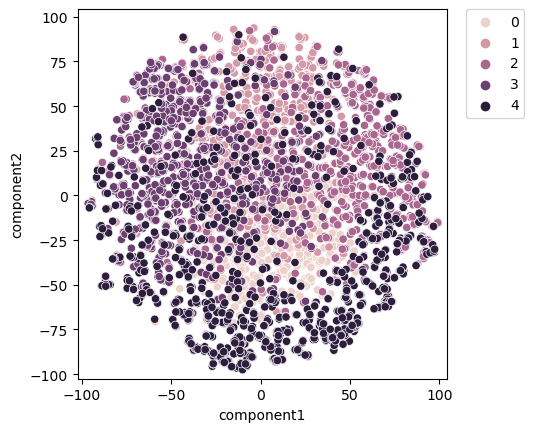

In [9]:
places8_clip_emd = "data/places8_image_features_clip_class_0.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_0.npy"
places8_targets = "data/places8_image_targets.npy"
clip_emb_0 = np.load(places8_clip_emd)
preds_softmax_0 = np.load(places8_image_softmax)
places8_targets = np.load(places8_targets)
places8_targets_0 = places8_targets[np.where(places8_targets==0)[0]]

# filter softmax per index 0
preds_softmax_0 = preds_softmax_0[:, 0]
print("Data with class 0:")
print(f"Embed shape {clip_emb_0.shape} | target shape {places8_targets_0.shape} | preds softmax shape {preds_softmax_0.shape}")

_ = slicer.fit(embeddings = clip_emb_0, targets = places8_targets_0, pred_probs = preds_softmax_0)
predict = slicer.predict(embeddings = clip_emb_0, targets = places8_targets_0, pred_probs = preds_softmax_0)
gen_tsne(predict, clip_emb_0, plot_n = 1000)

## class 1: bedroom | 5 slices

Data with class 1:
Embed shape (100012, 512) | target shape (100012,) | preds softmax shape (100012,)


 30%|██████████████████████████████████▌                                                                                | 30/100 [00:08<00:19,  3.57it/s]


[0 1 2 3 4] [53793 14701  1922  1353 28243]
1353


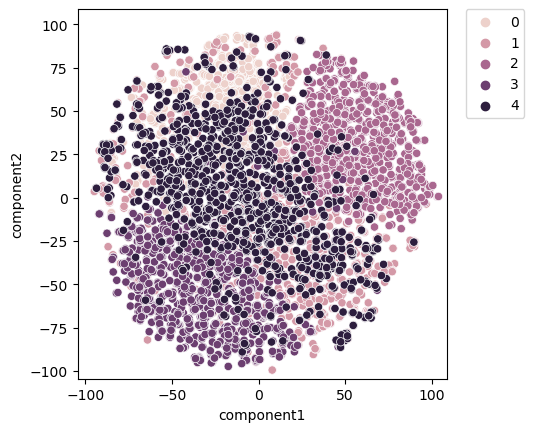

In [10]:
places8_clip_emd = "data/places8_image_features_clip_class_1.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_1.npy"
places8_targets = "data/places8_image_targets.npy"
clip_emb_1 = np.load(places8_clip_emd)
preds_softmax_1 = np.load(places8_image_softmax)
places8_targets = np.load(places8_targets)
places8_targets_1 = places8_targets[np.where(places8_targets==1)[0]]

# filter softmax per index 1
preds_softmax_1 = preds_softmax_1[:, 1]
print("Data with class 1:")
print(f"Embed shape {clip_emb_1.shape} | target shape {places8_targets_1.shape} | preds softmax shape {preds_softmax_1.shape}")

_ = slicer.fit(embeddings = clip_emb_1, targets = places8_targets_1, pred_probs = preds_softmax_1)
predict = slicer.predict(embeddings = clip_emb_1, targets = places8_targets_1, pred_probs = preds_softmax_1)
gen_tsne(predict, clip_emb_1)

## class 2: child's room | 5 slices

Data with class 2
Embed shape (41849, 512) | target shape (41849,) | preds softmax shape (41849, 3)


 65%|██████████████████████████████████████████████████████████████████████████▊                                        | 65/100 [00:06<00:03,  9.52it/s]


[0 1 2 3 4] [23899   326   134   240 17250]
134


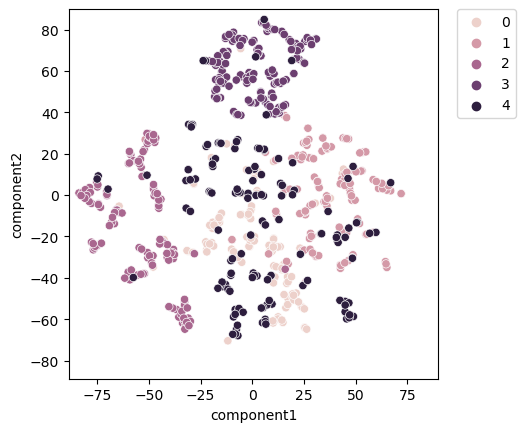

In [11]:
places8_clip_emd = "data/places8_image_features_clip_class_2.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_2.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_2 = np.load(places8_clip_emd)
preds_softmax_2 = np.load(places8_image_softmax)
places8_targets_2 = places8_targets[np.where(places8_targets == 2)[0]]
# places8_targets_2 = np.ones(places8_targets_2.shape, dtype = int)

# filter softmax per index 2
preds_softmax_2 = preds_softmax_2[:, :3]

print("Data with class 2")
print(f"Embed shape {clip_emb_2.shape} | target shape {places8_targets_2.shape} | preds softmax shape {preds_softmax_2.shape}")
_ = slicer.fit(embeddings = clip_emb_2, targets = places8_targets_2, pred_probs = preds_softmax_2)
predict = slicer.predict(embeddings = clip_emb_2, targets = places8_targets_2, pred_probs = preds_softmax_2)
gen_tsne(predict, clip_emb_2)

## class 3: classroom | 5 slices

Data with class 3
Embed shape (33763, 512) | target shape (33763,) | preds softmax shape (33763, 4)


 55%|███████████████████████████████████████████████████████████████▎                                                   | 55/100 [00:04<00:03, 12.75it/s]


[0 1 2 3 4] [  260  2686  1227 25442  4148]
260


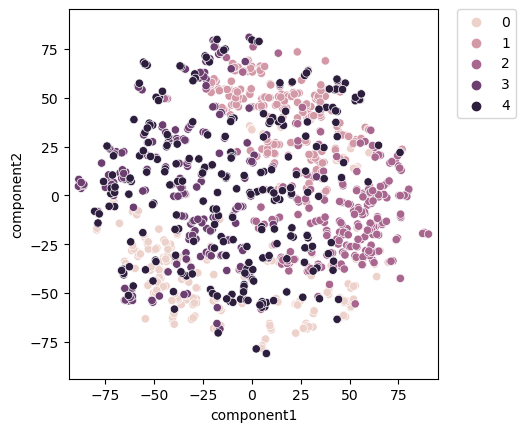

In [12]:
places8_clip_emd = "data/places8_image_features_clip_class_3.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_3.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_3 = np.load(places8_clip_emd)
preds_softmax_3 = np.load(places8_image_softmax)
places8_targets_3 = places8_targets[np.where(places8_targets == 3)[0]]
# places8_targets_3 = np.ones(places8_targets_3.shape, dtype = int)

# filter softmax per index 3
preds_softmax_3 = preds_softmax_3[:, :4]

print("Data with class 3")
print(f"Embed shape {clip_emb_3.shape} | target shape {places8_targets_3.shape} | preds softmax shape {preds_softmax_3.shape}")
_ = slicer.fit(embeddings = clip_emb_3, targets = places8_targets_3, pred_probs = preds_softmax_3)
predict = slicer.predict(embeddings = clip_emb_3, targets = places8_targets_3, pred_probs = preds_softmax_3)
gen_tsne(predict, clip_emb_3)

## class 4: dressing room | 5 slices

Data with class 4
Embed shape (21889, 512) | target shape (21889,) | preds softmax shape (21889, 5)


 64%|█████████████████████████████████████████████████████████████████████████▌                                         | 64/100 [00:02<00:01, 23.81it/s]


[0 1 2 3 4] [14568  5077   202  1907   135]
135


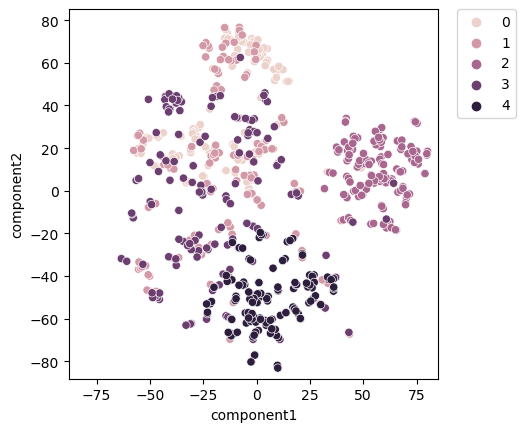

In [13]:
places8_clip_emd = "data/places8_image_features_clip_class_4.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_4.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_4 = np.load(places8_clip_emd)
preds_softmax_4 = np.load(places8_image_softmax)
places8_targets_4 = places8_targets[np.where(places8_targets == 4)[0]]
# places8_targets_4 = np.ones(places8_targets_4.shape, dtype = int)

# filter softmax per index 4
preds_softmax_4 = preds_softmax_4[:, :5]

print("Data with class 4")
print(f"Embed shape {clip_emb_4.shape} | target shape {places8_targets_4.shape} | preds softmax shape {preds_softmax_4.shape}")
_ = slicer.fit(embeddings = clip_emb_4, targets = places8_targets_4, pred_probs = preds_softmax_4)
predict = slicer.predict(embeddings = clip_emb_4, targets = places8_targets_4, pred_probs = preds_softmax_4)
gen_tsne(predict, clip_emb_4)

## class 5: living room | 5 slices

Data with class 5
Embed shape (89458, 512) | target shape (89458,) | preds softmax shape (89458, 6)


  6%|██████▉                                                                                                             | 6/100 [00:01<00:26,  3.54it/s]


[0 1 2 3 4] [71178  4825  6408  5732  1315]
1315


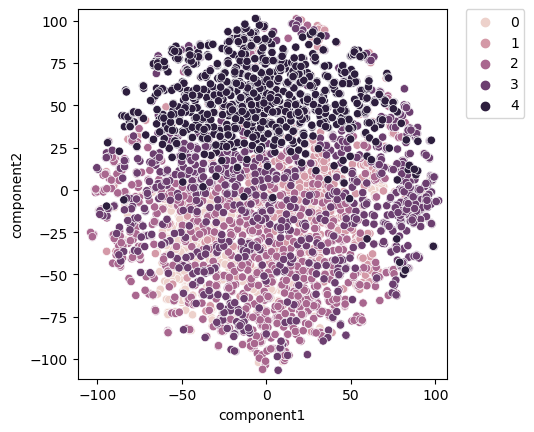

In [14]:
places8_clip_emd = "data/places8_image_features_clip_class_5.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_5.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_5 = np.load(places8_clip_emd)
preds_softmax_5 = np.load(places8_image_softmax)
places8_targets_5 = places8_targets[np.where(places8_targets == 5)[0]]
# places8_targets_5 = np.ones(places8_targets_4.shape, dtype = int)

# filter softmax per index 5
preds_softmax_5 = preds_softmax_5[:, :6]

print("Data with class 5")
print(f"Embed shape {clip_emb_5.shape} | target shape {places8_targets_5.shape} | preds softmax shape {preds_softmax_5.shape}")
_ = slicer.fit(embeddings = clip_emb_5, targets = places8_targets_5, pred_probs = preds_softmax_5)
predict = slicer.predict(embeddings = clip_emb_5, targets = places8_targets_5, pred_probs = preds_softmax_5)
gen_tsne(predict, clip_emb_5)

## class 6: studio | 5 slices

Data with class 6
Embed shape (12633, 512) | target shape (12633,) | preds softmax shape (12633, 7)


  9%|██████████▍                                                                                                         | 9/100 [00:00<00:02, 37.91it/s]


[0 1 2 3 4] [ 993 7873 2350 1318   99]
99


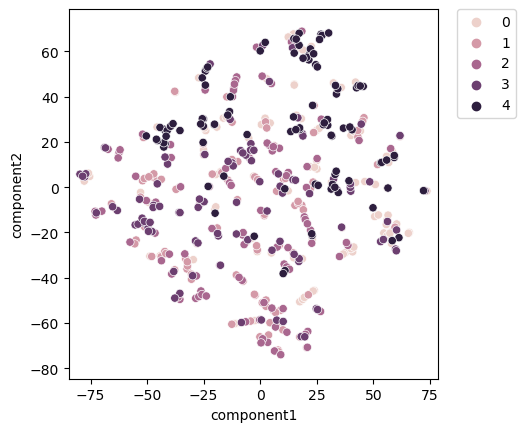

In [15]:
places8_clip_emd = "data/places8_image_features_clip_class_6.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_6.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_6 = np.load(places8_clip_emd)
preds_softmax_6 = np.load(places8_image_softmax)
places8_targets_6 = places8_targets[np.where(places8_targets == 6)[0]]
# places8_targets_6 = np.ones(places8_targets_6.shape, dtype = int)

# filter softmax per index 6
preds_softmax_6 = preds_softmax_6[:, :7]

print("Data with class 6")
print(f"Embed shape {clip_emb_6.shape} | target shape {places8_targets_6.shape} | preds softmax shape {preds_softmax_6.shape}")
_ = slicer.fit(embeddings = clip_emb_6, targets = places8_targets_6, pred_probs = preds_softmax_6)
predict = slicer.predict(embeddings = clip_emb_6, targets = places8_targets_6, pred_probs = preds_softmax_6)
gen_tsne(predict, clip_emb_6)

## class 7: swimming pool indoor | 5 slices

Data with class 7
Embed shape (13547, 512) | target shape (13547,) | preds softmax shape (13547, 8)


 13%|██████████████▉                                                                                                    | 13/100 [00:00<00:02, 38.14it/s]


[0 1 2 3 4] [ 716 2985 9419  212  215]
212


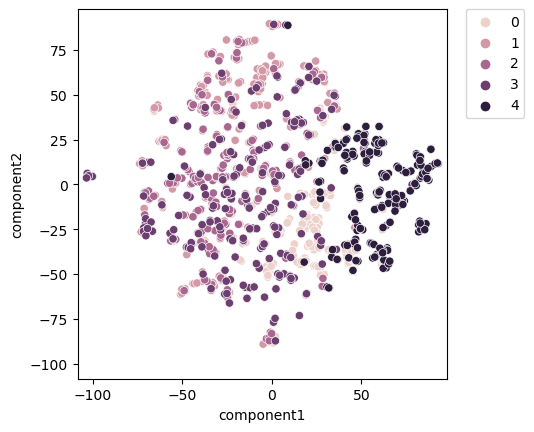

In [16]:
places8_clip_emd = "data/places8_image_features_clip_class_7.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_7.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_7 = np.load(places8_clip_emd)
preds_softmax_7 = np.load(places8_image_softmax)
places8_targets_7 = places8_targets[np.where(places8_targets == 7)[0]]
# places8_targets_7 = np.ones(places8_targets_4.shape, dtype = int)

# filter softmax per index 7
preds_softmax_7 = preds_softmax_7[:, :8]

print("Data with class 7")
print(f"Embed shape {clip_emb_7.shape} | target shape {places8_targets_7.shape} | preds softmax shape {preds_softmax_7.shape}")
_ = slicer.fit(embeddings = clip_emb_7, targets = places8_targets_7, pred_probs = preds_softmax_7)
predict = slicer.predict(embeddings = clip_emb_7, targets = places8_targets_7, pred_probs = preds_softmax_7)
gen_tsne(predict, clip_emb_7)

##

In [17]:
slicer = DominoSlicer(
    y_log_likelihood_weight=40,
    y_hat_log_likelihood_weight=40,
    n_mixture_components=25,
    n_slices=2,
    random_state = 42)
slicer.get_params()

{'n_slices': 2,
 'covariance_type': 'diag',
 'n_pca_components': 128,
 'n_mixture_components': 25,
 'init_params': 'kmeans',
 'confusion_noise': 0.001,
 'y_log_likelihood_weight': 40,
 'y_hat_log_likelihood_weight': 40,
 'max_iter': 100,
 'random_state': 42}

## Class 0: bathroom | 2 slices

Data with class 0:
Embed shape (51655, 512) | target shape (51655,) | preds softmax shape (51655,)


 65%|██████████████████████████████████████████████████████████████████████████▊                                        | 65/100 [00:08<00:04,  7.89it/s]


[0 1] [27902 23753]
1000


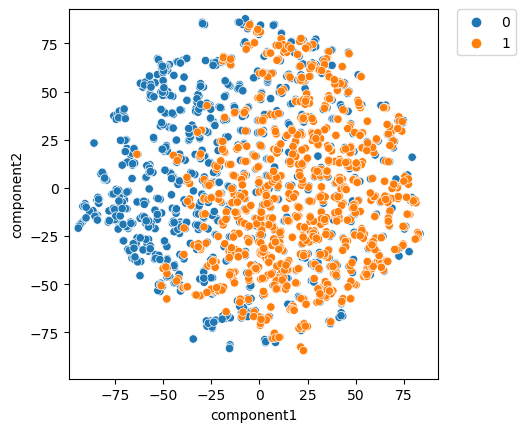

In [18]:
places8_clip_emd = "data/places8_image_features_clip_class_0.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_0.npy"
places8_targets = "data/places8_image_targets.npy"
clip_emb_0 = np.load(places8_clip_emd)
preds_softmax_0 = np.load(places8_image_softmax)
places8_targets = np.load(places8_targets)
places8_targets_0 = places8_targets[np.where(places8_targets==0)[0]]

# filter softmax per index 0
preds_softmax_0 = preds_softmax_0[:, 0]
print("Data with class 0:")
print(f"Embed shape {clip_emb_0.shape} | target shape {places8_targets_0.shape} | preds softmax shape {preds_softmax_0.shape}")

_ = slicer.fit(embeddings = clip_emb_0, targets = places8_targets_0, pred_probs = preds_softmax_0)
predict = slicer.predict(embeddings = clip_emb_0, targets = places8_targets_0, pred_probs = preds_softmax_0)
gen_tsne(predict, clip_emb_0, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
df.to_csv("outputs/class0_bathroom_2slices_otherclassessoftmax.csv", encoding='utf-8')

## class 1: bedroom | 2 slices


Data with class 1:
Embed shape (100012, 512) | target shape (100012,) | preds softmax shape (100012,)


 16%|██████████████████▍                                                                                                | 16/100 [00:04<00:23,  3.65it/s]


[0 1] [ 2162 97850]
2162
100012


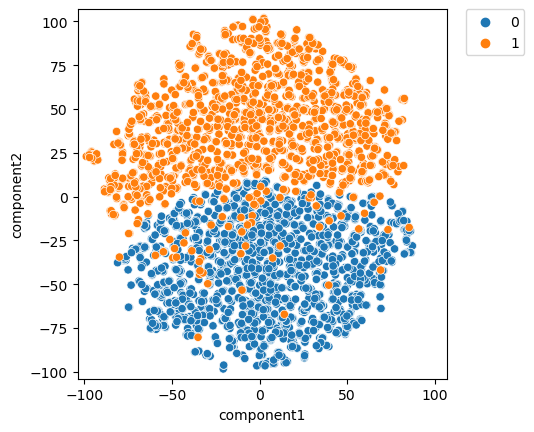

In [19]:
places8_clip_emd = "data/places8_image_features_clip_class_1.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_1.npy"
places8_targets = "data/places8_image_targets.npy"
clip_emb_1 = np.load(places8_clip_emd)
preds_softmax_1 = np.load(places8_image_softmax)
places8_targets = np.load(places8_targets)
places8_targets_1 = places8_targets[np.where(places8_targets==1)[0]]

# filter softmax per index 1
preds_softmax_1 = preds_softmax_1[:, 1]
print("Data with class 1:")
print(f"Embed shape {clip_emb_1.shape} | target shape {places8_targets_1.shape} | preds softmax shape {preds_softmax_1.shape}")

_ = slicer.fit(embeddings = clip_emb_1, targets = places8_targets_1, pred_probs = preds_softmax_1)
predict = slicer.predict(embeddings = clip_emb_1, targets = places8_targets_1, pred_probs = preds_softmax_1)
gen_tsne(predict, clip_emb_1, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class1_bedroom_2slices_otherclassessoftmax.csv", encoding='utf-8')

## class 2: child's room | 2 slices

Data with class 2
Embed shape (41849, 512) | target shape (41849,) | preds softmax shape (41849, 3)


 16%|██████████████████▍                                                                                                | 16/100 [00:01<00:09,  8.72it/s]


[0 1] [19662 22187]
19662
41849


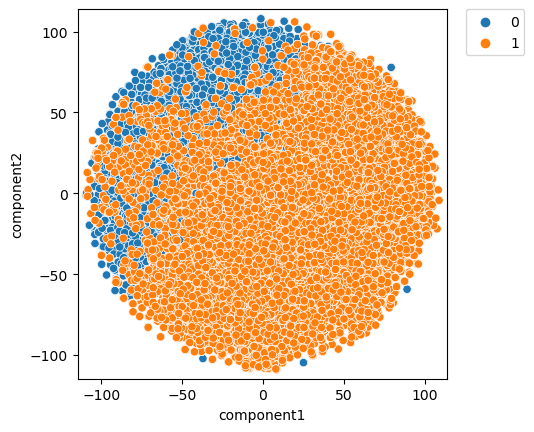

In [20]:
places8_clip_emd = "data/places8_image_features_clip_class_2.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_2.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_2 = np.load(places8_clip_emd)
preds_softmax_2 = np.load(places8_image_softmax)
places8_targets_2 = places8_targets[np.where(places8_targets == 2)[0]]
# places8_targets_2 = np.ones(places8_targets_2.shape, dtype = int)

# filter softmax per index 2
preds_softmax_2 = preds_softmax_2[:, :3]

print("Data with class 2")
print(f"Embed shape {clip_emb_2.shape} | target shape {places8_targets_2.shape} | preds softmax shape {preds_softmax_2.shape}")
_ = slicer.fit(embeddings = clip_emb_2, targets = places8_targets_2, pred_probs = preds_softmax_2)
predict = slicer.predict(embeddings = clip_emb_2, targets = places8_targets_2, pred_probs = preds_softmax_2)
gen_tsne(predict, clip_emb_2, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class2_childsroom_2slices_otherclassessoftmax.csv", encoding='utf-8')

## class 3: classroom | 2 slices

Data with class 3
Embed shape (33763, 512) | target shape (33763,) | preds softmax shape (33763, 4)


 19%|█████████████████████▊                                                                                             | 19/100 [00:01<00:06, 12.84it/s]


[0 1] [15894 17869]
1000
33763


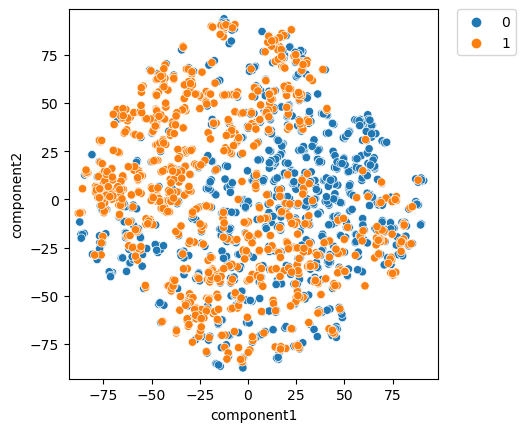

In [21]:
places8_clip_emd = "data/places8_image_features_clip_class_3.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_3.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_3 = np.load(places8_clip_emd)
preds_softmax_3 = np.load(places8_image_softmax)
places8_targets_3 = places8_targets[np.where(places8_targets == 3)[0]]
# places8_targets_3 = np.ones(places8_targets_3.shape, dtype = int)

# filter softmax per index 3
preds_softmax_3 = preds_softmax_3[:, :4]

print("Data with class 3")
print(f"Embed shape {clip_emb_3.shape} | target shape {places8_targets_3.shape} | preds softmax shape {preds_softmax_3.shape}")
_ = slicer.fit(embeddings = clip_emb_3, targets = places8_targets_3, pred_probs = preds_softmax_3)
predict = slicer.predict(embeddings = clip_emb_3, targets = places8_targets_3, pred_probs = preds_softmax_3)
gen_tsne(predict, clip_emb_3, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class3_classroom_2slices_otherclassessoftmax.csv", encoding='utf-8')

## class 4: dressing room | 2 slices

Data with class 4
Embed shape (21889, 512) | target shape (21889,) | preds softmax shape (21889, 5)


 48%|███████████████████████████████████████████████████████▏                                                           | 48/100 [00:01<00:02, 24.32it/s]


[0 1] [15171  6718]
1000
21889


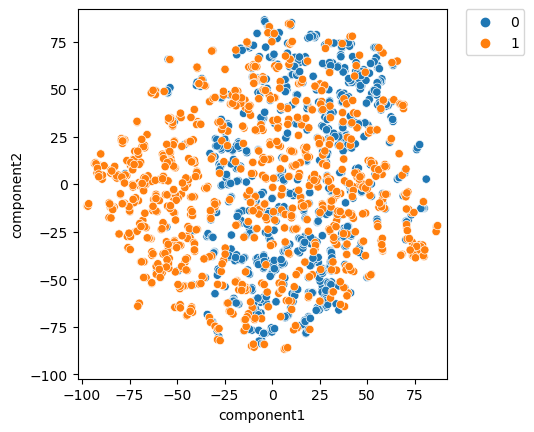

In [22]:
places8_clip_emd = "data/places8_image_features_clip_class_4.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_4.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_4 = np.load(places8_clip_emd)
preds_softmax_4 = np.load(places8_image_softmax)
places8_targets_4 = places8_targets[np.where(places8_targets == 4)[0]]
# places8_targets_4 = np.ones(places8_targets_4.shape, dtype = int)

# filter softmax per index 4
preds_softmax_4 = preds_softmax_4[:, :5]

print("Data with class 4")
print(f"Embed shape {clip_emb_4.shape} | target shape {places8_targets_4.shape} | preds softmax shape {preds_softmax_4.shape}")
_ = slicer.fit(embeddings = clip_emb_4, targets = places8_targets_4, pred_probs = preds_softmax_4)
predict = slicer.predict(embeddings = clip_emb_4, targets = places8_targets_4, pred_probs = preds_softmax_4)
gen_tsne(predict, clip_emb_4, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class4_dressingroom_2slices_otherclassessoftmax.csv", encoding='utf-8')

## class 5: living room | 2 slices

Data with class 5
Embed shape (89458, 512) | target shape (89458,) | preds softmax shape (89458, 6)


 48%|███████████████████████████████████████████████████████▏                                                           | 48/100 [00:11<00:12,  4.01it/s]


[0 1] [79122 10336]
1000
89458


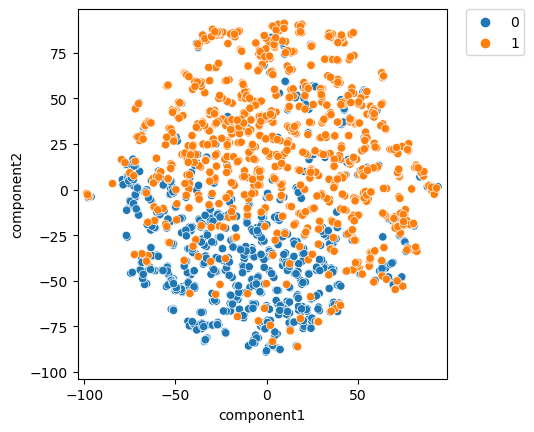

In [23]:
places8_clip_emd = "data/places8_image_features_clip_class_5.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_5.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_5 = np.load(places8_clip_emd)
preds_softmax_5 = np.load(places8_image_softmax)
places8_targets_5 = places8_targets[np.where(places8_targets == 5)[0]]
# places8_targets_5 = np.ones(places8_targets_4.shape, dtype = int)

# filter softmax per index 5
preds_softmax_5 = preds_softmax_5[:, :6]

print("Data with class 5")
print(f"Embed shape {clip_emb_5.shape} | target shape {places8_targets_5.shape} | preds softmax shape {preds_softmax_5.shape}")
_ = slicer.fit(embeddings = clip_emb_5, targets = places8_targets_5, pred_probs = preds_softmax_5)
predict = slicer.predict(embeddings = clip_emb_5, targets = places8_targets_5, pred_probs = preds_softmax_5)
gen_tsne(predict, clip_emb_5, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class5_livingroom_2slices_otherclassessoftmax.csv", encoding='utf-8')

## class 6: studio | 2 slices

Data with class 6
Embed shape (12633, 512) | target shape (12633,) | preds softmax shape (12633, 7)


 37%|██████████████████████████████████████████▌                                                                        | 37/100 [00:00<00:01, 40.86it/s]


[0 1] [ 1732 10901]
1000
12633


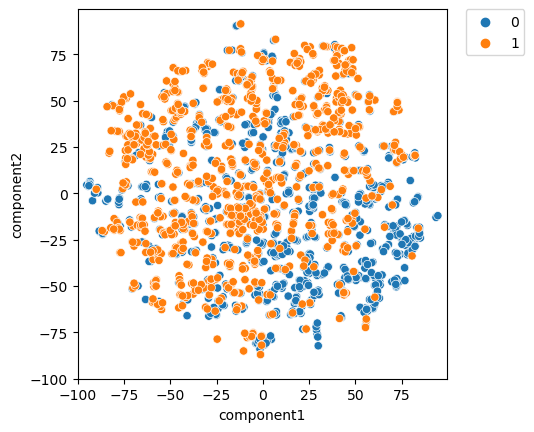

In [24]:
places8_clip_emd = "data/places8_image_features_clip_class_6.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_6.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_6 = np.load(places8_clip_emd)
preds_softmax_6 = np.load(places8_image_softmax)
places8_targets_6 = places8_targets[np.where(places8_targets == 6)[0]]
# places8_targets_6 = np.ones(places8_targets_6.shape, dtype = int)

# filter softmax per index 6
preds_softmax_6 = preds_softmax_6[:, :7]

print("Data with class 6")
print(f"Embed shape {clip_emb_6.shape} | target shape {places8_targets_6.shape} | preds softmax shape {preds_softmax_6.shape}")
_ = slicer.fit(embeddings = clip_emb_6, targets = places8_targets_6, pred_probs = preds_softmax_6)
predict = slicer.predict(embeddings = clip_emb_6, targets = places8_targets_6, pred_probs = preds_softmax_6)
gen_tsne(predict, clip_emb_6, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class6_studio_2slices_otherclassessoftmax.csv", encoding='utf-8')

## class 7: swimming pool | 2 slices

Data with class 7
Embed shape (13547, 512) | target shape (13547,) | preds softmax shape (13547, 8)


 13%|██████████████▉                                                                                                    | 13/100 [00:00<00:02, 37.91it/s]


[0 1] [ 1122 12425]
1000
13547


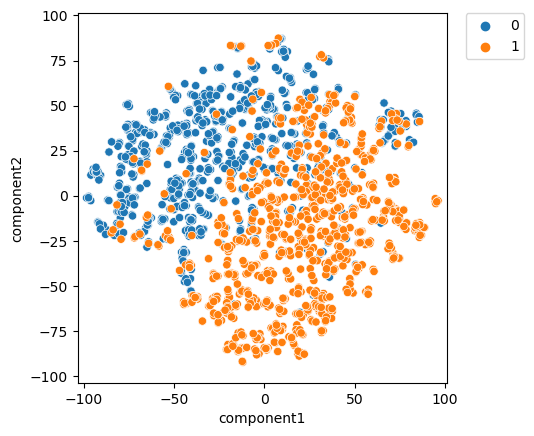

In [25]:
places8_clip_emd = "data/places8_image_features_clip_class_7.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_7.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_7 = np.load(places8_clip_emd)
preds_softmax_7 = np.load(places8_image_softmax)
places8_targets_7 = places8_targets[np.where(places8_targets == 7)[0]]
# places8_targets_7 = np.ones(places8_targets_4.shape, dtype = int)

# filter softmax per index 7
preds_softmax_7 = preds_softmax_7[:, :8]

print("Data with class 7")
print(f"Embed shape {clip_emb_7.shape} | target shape {places8_targets_7.shape} | preds softmax shape {preds_softmax_7.shape}")
_ = slicer.fit(embeddings = clip_emb_7, targets = places8_targets_7, pred_probs = preds_softmax_7)
predict = slicer.predict(embeddings = clip_emb_7, targets = places8_targets_7, pred_probs = preds_softmax_7)
gen_tsne(predict, clip_emb_7, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class7_swimmingpool_2slices_otherclassessoftmax.csv", encoding='utf-8')

## Jeitinho diferente

## Class 0: bathroom | 2 slices

Data with class 0:
Embed shape (51655, 512) | target shape (51655,) | preds softmax shape (51655,)


 11%|████████████▋                                                                                                      | 11/100 [00:01<00:11,  7.96it/s]


[0 1] [40347 11308]
11308
51655


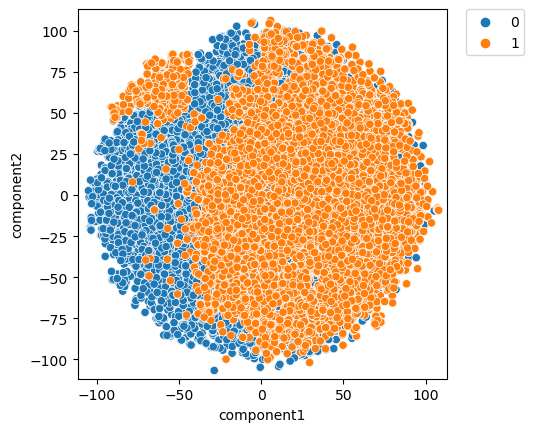

In [26]:
places8_clip_emd = "data/places8_image_features_clip_class_0.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_0.npy"
places8_targets = "data/places8_image_targets.npy"
clip_emb_0 = np.load(places8_clip_emd)
preds_softmax_0 = np.load(places8_image_softmax)

places8_targets = np.load(places8_targets)
places8_targets_0 = places8_targets[np.where(places8_targets==0)[0]]
places8_targets_0 = np.ones(places8_targets_0.shape, dtype = int)


# filter softmax per index 0
preds_softmax_0 = preds_softmax_0[:, 0]
print("Data with class 0:")
print(f"Embed shape {clip_emb_0.shape} | target shape {places8_targets_0.shape} | preds softmax shape {preds_softmax_0.shape}")

_ = slicer.fit(embeddings = clip_emb_0, targets = places8_targets_0, pred_probs = preds_softmax_0)
predict = slicer.predict(embeddings = clip_emb_0, targets = places8_targets_0, pred_probs = preds_softmax_0)
gen_tsne(predict, clip_emb_0, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class0_bathroom_2slices_binarytargets.csv", encoding='utf-8')

## class 1: bedroom | 2 slices


Data with class 1:
Embed shape (100012, 512) | target shape (100012,) | preds softmax shape (100012,)


 48%|███████████████████████████████████████████████████████▏                                                           | 48/100 [00:11<00:12,  4.27it/s]


[0 1] [97880  2132]
2132
100012


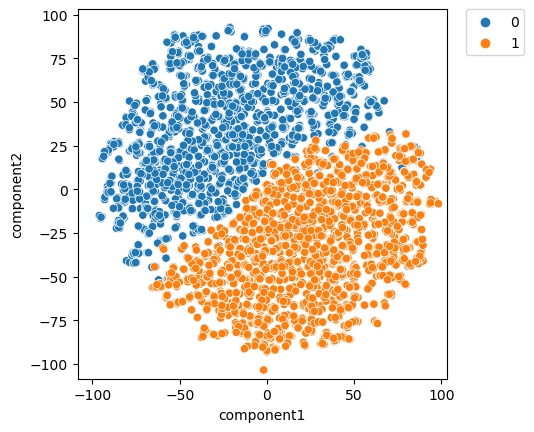

In [27]:
places8_clip_emd = "data/places8_image_features_clip_class_1.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_1.npy"
places8_targets = "data/places8_image_targets.npy"
clip_emb_1 = np.load(places8_clip_emd)
preds_softmax_1 = np.load(places8_image_softmax)

places8_targets = np.load(places8_targets)
places8_targets_1 = places8_targets[np.where(places8_targets==1)[0]]
places8_targets_1 = np.ones(places8_targets_1.shape, dtype = int)


# filter softmax per index 1
preds_softmax_1 = preds_softmax_1[:, 1]
print("Data with class 1:")
print(f"Embed shape {clip_emb_1.shape} | target shape {places8_targets_1.shape} | preds softmax shape {preds_softmax_1.shape}")

_ = slicer.fit(embeddings = clip_emb_1, targets = places8_targets_1, pred_probs = preds_softmax_1)
predict = slicer.predict(embeddings = clip_emb_1, targets = places8_targets_1, pred_probs = preds_softmax_1)
gen_tsne(predict, clip_emb_1, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class1_bedroom_2slices_binarytargets.csv", encoding='utf-8')

## class 2: child's room | 2 slices

Data with class 2
Embed shape (41849, 512) | target shape (41849,) | preds softmax shape (41849,)


 26%|█████████████████████████████▉                                                                                     | 26/100 [00:02<00:07, 10.48it/s]


[0 1] [12815 29034]
1000
41849


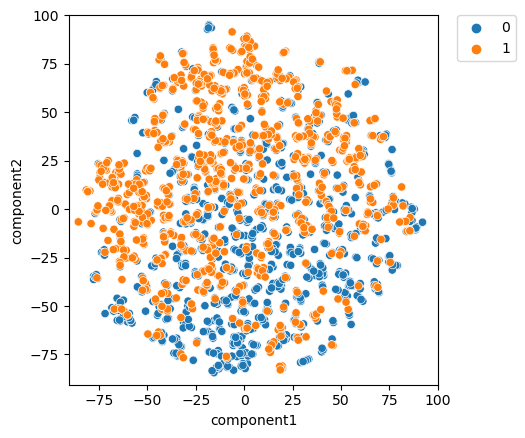

In [28]:
places8_clip_emd = "data/places8_image_features_clip_class_2.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_2.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_2 = np.load(places8_clip_emd)
preds_softmax_2 = np.load(places8_image_softmax)
places8_targets_2 = places8_targets[np.where(places8_targets == 2)[0]]
places8_targets_2 = np.ones(places8_targets_2.shape, dtype = int)

# filter softmax per index 2
preds_softmax_2 = preds_softmax_2[:, 2]

print("Data with class 2")
print(f"Embed shape {clip_emb_2.shape} | target shape {places8_targets_2.shape} | preds softmax shape {preds_softmax_2.shape}")
_ = slicer.fit(embeddings = clip_emb_2, targets = places8_targets_2, pred_probs = preds_softmax_2)
predict = slicer.predict(embeddings = clip_emb_2, targets = places8_targets_2, pred_probs = preds_softmax_2)
gen_tsne(predict, clip_emb_2, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class2_childsroom_2slices_binarytargets.csv", encoding='utf-8')

## class 3: classroom | 2 slices

Data with class 3
Embed shape (33763, 512) | target shape (33763,) | preds softmax shape (33763,)


 15%|█████████████████▎                                                                                                 | 15/100 [00:01<00:06, 12.33it/s]


[0 1] [ 2670 31093]
1000
33763


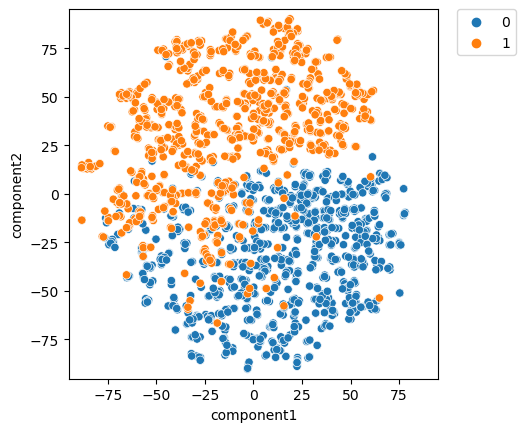

In [29]:
places8_clip_emd = "data/places8_image_features_clip_class_3.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_3.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_3 = np.load(places8_clip_emd)
preds_softmax_3 = np.load(places8_image_softmax)
places8_targets_3 = places8_targets[np.where(places8_targets == 3)[0]]
places8_targets_3 = np.ones(places8_targets_3.shape, dtype = int)

# filter softmax per index 3
preds_softmax_3 = preds_softmax_3[:, 3]

print("Data with class 3")
print(f"Embed shape {clip_emb_3.shape} | target shape {places8_targets_3.shape} | preds softmax shape {preds_softmax_3.shape}")
_ = slicer.fit(embeddings = clip_emb_3, targets = places8_targets_3, pred_probs = preds_softmax_3)
predict = slicer.predict(embeddings = clip_emb_3, targets = places8_targets_3, pred_probs = preds_softmax_3)
gen_tsne(predict, clip_emb_3, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class3_classroom_2slices_binarytargets.csv", encoding='utf-8')

## class 4: dressing room | 2 slices

Data with class 4
Embed shape (21889, 512) | target shape (21889,) | preds softmax shape (21889,)


  9%|██████████▍                                                                                                         | 9/100 [00:00<00:03, 25.08it/s]


[0 1] [ 1760 20129]
1760
21889


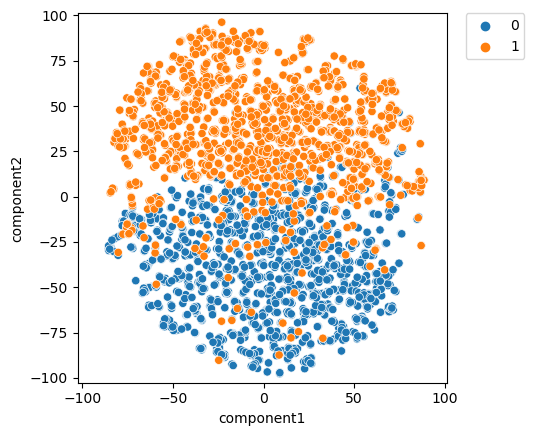

In [30]:
places8_clip_emd = "data/places8_image_features_clip_class_4.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_4.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_4 = np.load(places8_clip_emd)
preds_softmax_4 = np.load(places8_image_softmax)
places8_targets_4 = places8_targets[np.where(places8_targets == 4)[0]]
places8_targets_4 = np.ones(places8_targets_4.shape, dtype = int)

# filter softmax per index 4
preds_softmax_4 = preds_softmax_4[:, 4]

print("Data with class 4")
print(f"Embed shape {clip_emb_4.shape} | target shape {places8_targets_4.shape} | preds softmax shape {preds_softmax_4.shape}")
_ = slicer.fit(embeddings = clip_emb_4, targets = places8_targets_4, pred_probs = preds_softmax_4)
predict = slicer.predict(embeddings = clip_emb_4, targets = places8_targets_4, pred_probs = preds_softmax_4)
gen_tsne(predict, clip_emb_4, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class4_dressingroom_2slices_binarytargets.csv", encoding='utf-8')

## class 5: living room | 2 slices

Data with class 5
Embed shape (89458, 512) | target shape (89458,) | preds softmax shape (89458,)


 12%|█████████████▊                                                                                                     | 12/100 [00:02<00:19,  4.47it/s]


[0 1] [  537 88921]
537
89458


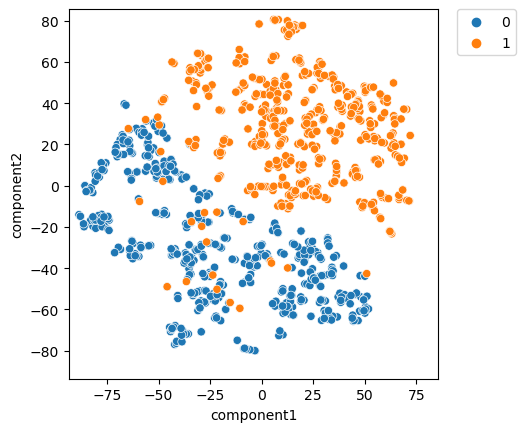

In [32]:
places8_clip_emd = "data/places8_image_features_clip_class_5.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_5.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_5 = np.load(places8_clip_emd)
preds_softmax_5 = np.load(places8_image_softmax)
places8_targets_5 = places8_targets[np.where(places8_targets == 5)[0]]
places8_targets_5 = np.ones(places8_targets_5.shape, dtype = int)

# filter softmax per index 5
preds_softmax_5 = preds_softmax_5[:, 5]

print("Data with class 5")
print(f"Embed shape {clip_emb_5.shape} | target shape {places8_targets_5.shape} | preds softmax shape {preds_softmax_5.shape}")
_ = slicer.fit(embeddings = clip_emb_5, targets = places8_targets_5, pred_probs = preds_softmax_5)
predict = slicer.predict(embeddings = clip_emb_5, targets = places8_targets_5, pred_probs = preds_softmax_5)
gen_tsne(predict, clip_emb_5, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class5_livingroom_2slices_binarytargets.csv", encoding='utf-8')

## class 6: studio | 2 slices

Data with class 6
Embed shape (12633, 512) | target shape (12633,) | preds softmax shape (12633,)


 27%|███████████████████████████████                                                                                    | 27/100 [00:00<00:01, 46.93it/s]


[0 1] [ 1658 10975]
900
12633


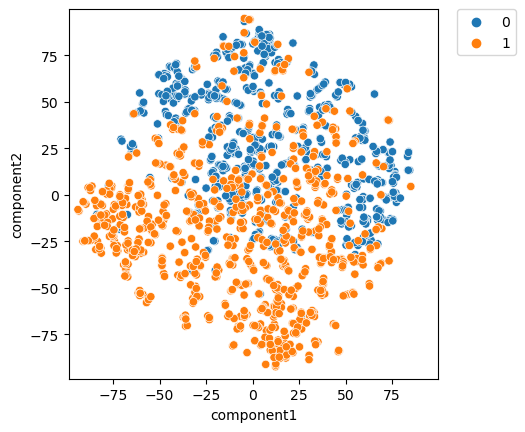

In [33]:
places8_clip_emd = "data/places8_image_features_clip_class_6.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_6.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_6 = np.load(places8_clip_emd)
preds_softmax_6 = np.load(places8_image_softmax)
places8_targets_6 = places8_targets[np.where(places8_targets == 6)[0]]
places8_targets_6 = np.ones(places8_targets_6.shape, dtype = int)

# filter softmax per index 6
preds_softmax_6 = preds_softmax_6[:, 6]

print("Data with class 6")
print(f"Embed shape {clip_emb_6.shape} | target shape {places8_targets_6.shape} | preds softmax shape {preds_softmax_6.shape}")
_ = slicer.fit(embeddings = clip_emb_6, targets = places8_targets_6, pred_probs = preds_softmax_6)
predict = slicer.predict(embeddings = clip_emb_6, targets = places8_targets_6, pred_probs = preds_softmax_6)
gen_tsne(predict, clip_emb_6, plot_n = 900, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class6_studio_2slices_binarytargets.csv", encoding='utf-8')

## class 7: swimming pool | 2 slices

Data with class 7
Embed shape (13547, 512) | target shape (13547,) | preds softmax shape (13547,)


 27%|███████████████████████████████                                                                                    | 27/100 [00:00<00:01, 43.14it/s]


[0 1] [4932 8615]
1000
13547


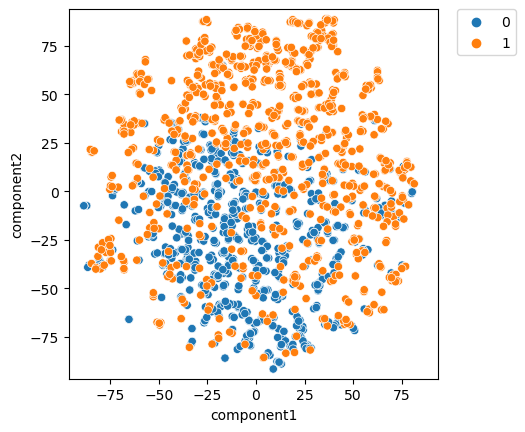

In [34]:
places8_clip_emd = "data/places8_image_features_clip_class_7.npy"
places8_image_softmax = "data/places8_image_features_resnet50_softmax_class_7.npy"
places8_targets = "data/places8_image_targets.npy"

places8_targets = np.load(places8_targets)
clip_emb_7 = np.load(places8_clip_emd)
preds_softmax_7 = np.load(places8_image_softmax)
places8_targets_7 = places8_targets[np.where(places8_targets == 7)[0]]
places8_targets_7 = np.ones(places8_targets_7.shape, dtype = int)

# filter softmax per index 7
preds_softmax_7 = preds_softmax_7[:, 7]

print("Data with class 7")
print(f"Embed shape {clip_emb_7.shape} | target shape {places8_targets_7.shape} | preds softmax shape {preds_softmax_7.shape}")
_ = slicer.fit(embeddings = clip_emb_7, targets = places8_targets_7, pred_probs = preds_softmax_7)
predict = slicer.predict(embeddings = clip_emb_7, targets = places8_targets_7, pred_probs = preds_softmax_7)
gen_tsne(predict, clip_emb_7, plot_n = 1000, n = 2)
df = pd.DataFrame(predict, columns=['cluster 0', 'cluster 1'])
print(len(df))
df.to_csv("outputs/class7_swimmingpool_2slices_binarytargets.csv", encoding='utf-8')

## Domino describe/exploring feature

ref: https://colab.research.google.com/github/HazyResearch/domino/blob/main/examples/01_intro.ipynb#scrollTo=WupRrym56jyM

In [ ]:
from domino import generate_candidate_descriptions
phrase_templates = [
    "a photo of [MASK].",
    "a photo of {} [MASK].",
    "a photo of [MASK] {}.",
    "a photo of [MASK] {} [MASK].",
]

text_df = generate_candidate_descriptions(
    templates=phrase_templates,
    num_candidates=10_000
)